In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from dataset import COCOPanopticDataset, COCODataLoader
from copy import copy, deepcopy
import json
from PIL import Image
import pickle as pkl

In [3]:
ds = COCOPanopticDataset(maindir="/USERSPACE/lukovdg1/coco2017", split="train", casmode="doublecross")
print(len(ds))

loading captions
loading panoptics
Creating examples


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118287/118287 [00:00<00:00, 220273.38it/s]


Size stats:
{448: 43836, 512: 8442, 384: 45521}
Retained examples: 92250
Too many regions: 4926
Too few regions: 623
92250


In [4]:
ds.filter_ids({460872, 494550})

In [5]:
len(ds)

2

In [6]:
def crop_and_resize(x, size=512, resample=Image.BICUBIC):
    if x.size == (size, size):
        return x
    w, h = x.size
    print(w, h)
    s = min(w, h)
    # compute maximum centercrop
    w_remain, h_remain = w - s, h - s
    x = x.crop((round(w_remain / 2), round(h_remain / 2), w - (w_remain - round(w_remain / 2)), h - (h_remain - round(h_remain / 2))))
    print(x.size)
    x = x.resize((size, size), resample=resample)
    print(x.size)
    return x
    

In [7]:
def prep_dev_ex(example, caption=None, swaps=None):
    example.image_data = crop_and_resize(example.load_image())
    example.image_path = None
    example.seg_data = crop_and_resize(example.load_seg_image(), resample=Image.NEAREST)
    example.seg_path = None
    example.cropsize = 512
    if caption is not None:
        example.captions = [caption]
    
    example2 = deepcopy(example)
    
    for k in example2.seg_info:
        v = example2.seg_info[k]
        if v["caption"] in swaps:
            print(f'{k} swapping: {v} --> {swaps[v["caption"]]}')
            example2.seg_info[k]["caption"] = swaps[v["caption"]]
            
    return example, example2


def display_example(example):
    display(example.load_image())
    display(example.load_seg_image())
    print(json.dumps(example.seg_info, indent=4))
    

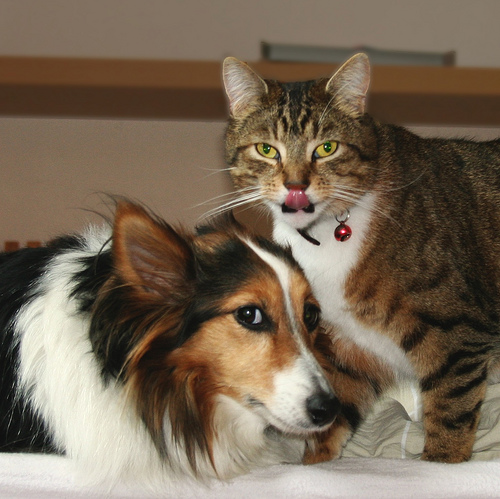

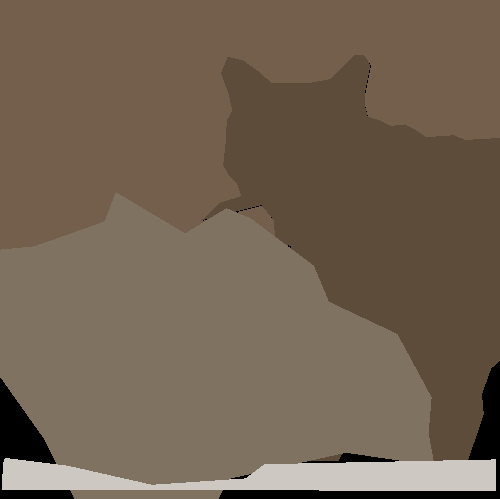

{
    "3755100": {
        "category_id": 17,
        "caption": "cat"
    },
    "6320768": {
        "category_id": 18,
        "caption": "dog"
    },
    "12699853": {
        "category_id": 65,
        "caption": "bed"
    },
    "4939635": {
        "category_id": 199,
        "caption": "wall"
    }
}
500 499
(499, 499)
(512, 512)
500 499
(499, 499)
(512, 512)
3755100 swapping: {'category_id': 17, 'caption': 'cat'} --> dog
6320768 swapping: {'category_id': 18, 'caption': 'dog'} --> cat


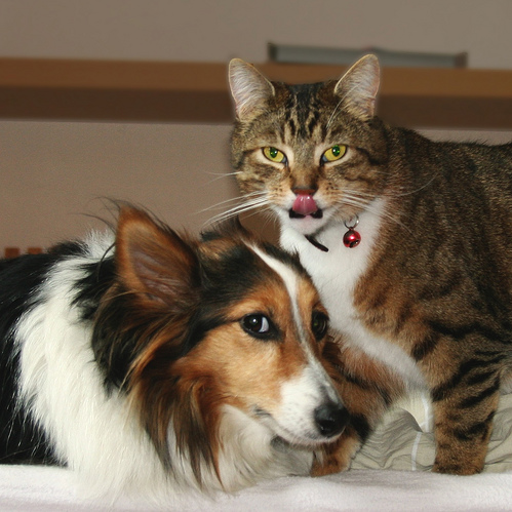

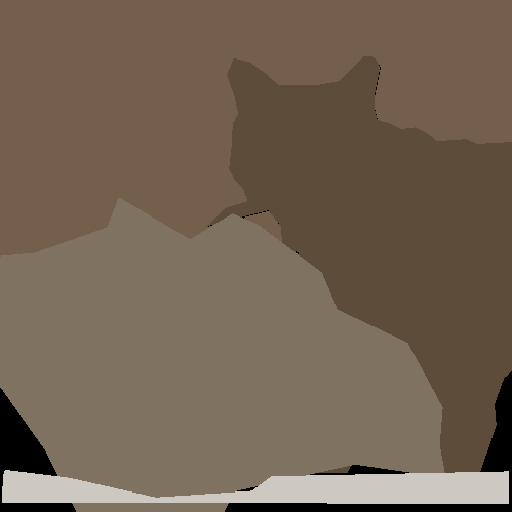

{
    "3755100": {
        "category_id": 17,
        "caption": "dog"
    },
    "6320768": {
        "category_id": 18,
        "caption": "cat"
    },
    "12699853": {
        "category_id": 65,
        "caption": "bed"
    },
    "4939635": {
        "category_id": 199,
        "caption": "wall"
    }
}


In [8]:
catdogexample = deepcopy(ds.examples[0][1][1])
display_example(catdogexample)

catdog1, catdog2 = prep_dev_ex(catdogexample, caption="a brown dog sitting next to a grey cat", swaps={"cat": "dog", "dog": "cat"})
display_example(catdog2)

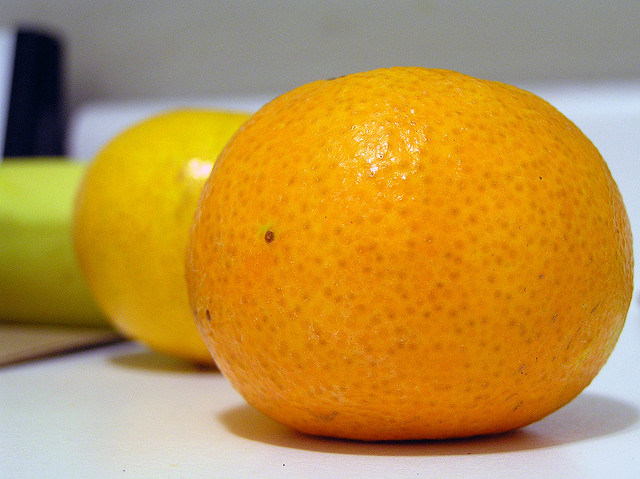

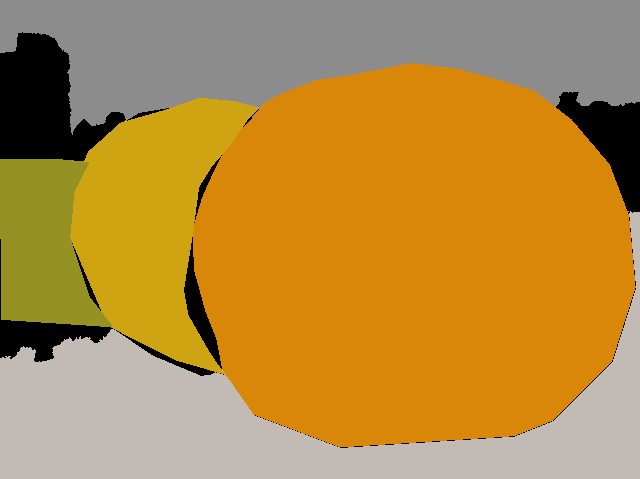

{
    "2265493": {
        "category_id": 52,
        "caption": "banana"
    },
    "1221838": {
        "category_id": 53,
        "caption": "apple"
    },
    "559064": {
        "category_id": 55,
        "caption": "orange"
    },
    "11909825": {
        "category_id": 189,
        "caption": "table"
    },
    "9145483": {
        "category_id": 199,
        "caption": "wall"
    }
}
640 479
(479, 479)
(512, 512)
640 479
(479, 479)
(512, 512)
1221838 swapping: {'category_id': 53, 'caption': 'apple'} --> orange
559064 swapping: {'category_id': 55, 'caption': 'orange'} --> apple


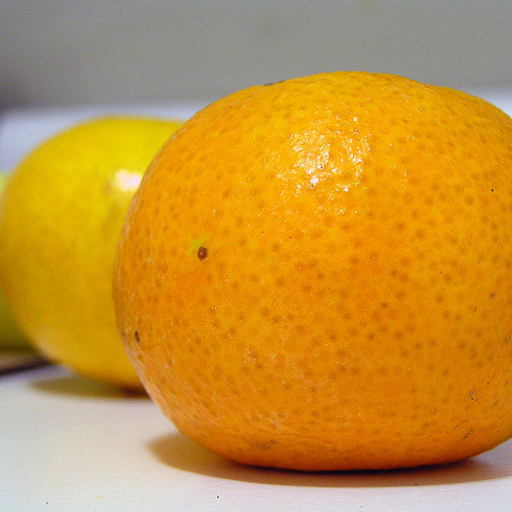

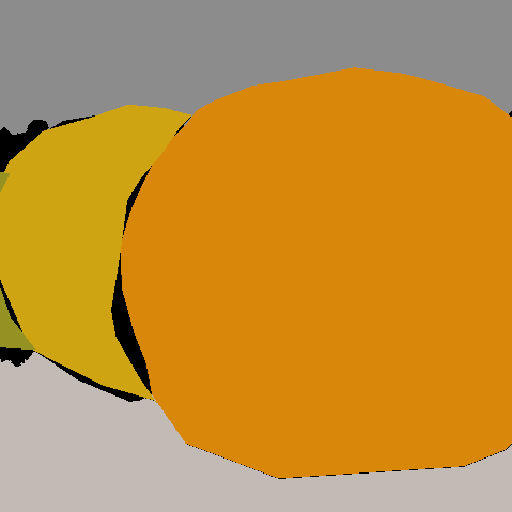

{
    "2265493": {
        "category_id": 52,
        "caption": "banana"
    },
    "1221838": {
        "category_id": 53,
        "caption": "orange"
    },
    "559064": {
        "category_id": 55,
        "caption": "apple"
    },
    "11909825": {
        "category_id": 189,
        "caption": "table"
    },
    "9145483": {
        "category_id": 199,
        "caption": "wall"
    }
}


In [9]:
orangeexample = deepcopy(ds.examples[0][1][0])
display_example(orangeexample)

orange1, orange2 = prep_dev_ex(orangeexample, caption="a green apple sitting next to a red orange", swaps={"orange": "apple", "apple": "orange"})
display_example(orange2)

In [10]:
with open("coco2017.4dev.examples.pkl", "wb") as f:
    pkl.dump([catdog1, catdog2, orange1, orange2], f)

In [88]:
catdog1.seg_info

{3755100: {'category_id': 17, 'caption': 'cat'},
 6320768: {'category_id': 18, 'caption': 'dog'},
 12699853: {'category_id': 65, 'caption': 'bed'},
 4939635: {'category_id': 199, 'caption': 'wall'}}

In [103]:
i = 0
f":{i}}}"

':0}'

In [19]:
# port rabbitfire and balls examples to this format

In [92]:
from gradio_pww import unpack_layers
import psd_tools
import numpy as np
import torch
from dataset import COCOPanopticExample
import re

In [111]:
def segmap_from_layers(layers, globalprompt):
    ret = None
    retdict = {}
    for i, layer in enumerate(layers):
        randomcolor = torch.randint(0, 256, (3,))     # RGB
        code = randomcolor[0].item() + randomcolor[1].item() * 256 + randomcolor[2].item() * (256**2)
        if f":{i}}}" in globalprompt:
            globalprompt = re.sub(f"\:{i}\\}}", f":{code}}}", globalprompt)
        mask = layer[(512,512)]
        maskcolor = mask.unsqueeze(-1).repeat(1, 1, 3) * randomcolor[None, None, :]
        if ret is None:
            ret = torch.zeros_like(maskcolor)
        ret = torch.where(mask.unsqueeze(-1) > 0.5, maskcolor, ret)
        retdict[code] = {"caption": layer["pos"]}
        
    ret = (ret).to(torch.long).cpu().numpy()
    
    return ret, retdict, globalprompt

def psd_to_cocopanoptic(fp):
    layers = psd_tools.PSDImage.open(fp)
    spec = unpack_layers(layers)
    segmap, prompts, globalprompt = segmap_from_layers(spec["layers"], spec["global"]["pos"])
    img = Image.fromarray(segmap.astype(np.uint8))
    ret = COCOPanopticExample(
        id=-1,
        img=img,
        captions=[globalprompt],
        seg_img=img,
        seg_info=prompts,
        cropsize=512
    )
    return ret


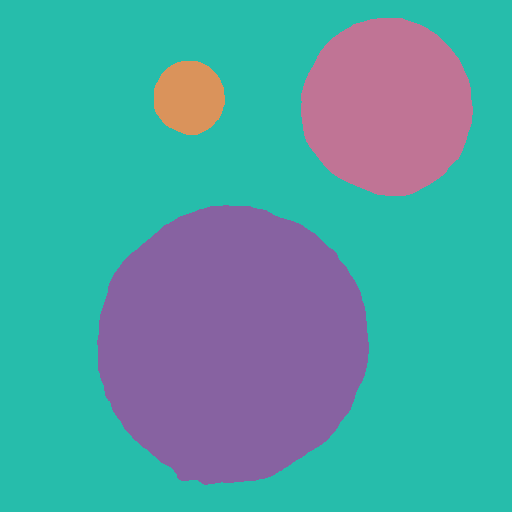

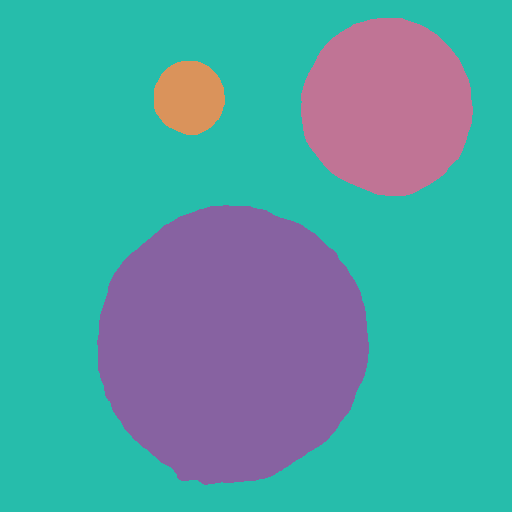

{11255078: {'caption': 'a highly detailed photorealistic image of a wooden table'},
 9794752: {'caption': 'a highly detailed photorealistic image of a red tennis ball'},
 10576519: {'caption': 'a highly detailed photorealistic image of a blue crystal ball'},
 6001626: {'caption': 'a highly detailed photorealistic image of a gold coin'}}

In [109]:
fp = '/USERSPACE/lukovdg1/datasets2/datasets/images/balls2.psd'

example = psd_to_cocopanoptic(fp)
display(example.load_image())
display(example.load_seg_image())
example.seg_info

In [110]:
example.captions

['a highly detailed photorealistic image of {a gold coin:6001626}, {a blue crystal ball:10576519} and {a red tennis ball:9794752} on {a wooden table:11255078}.']

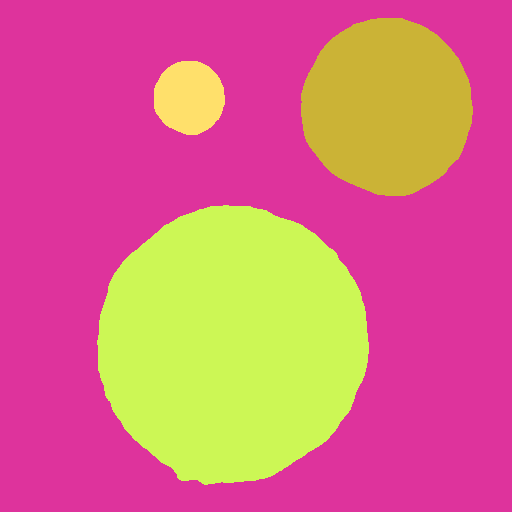

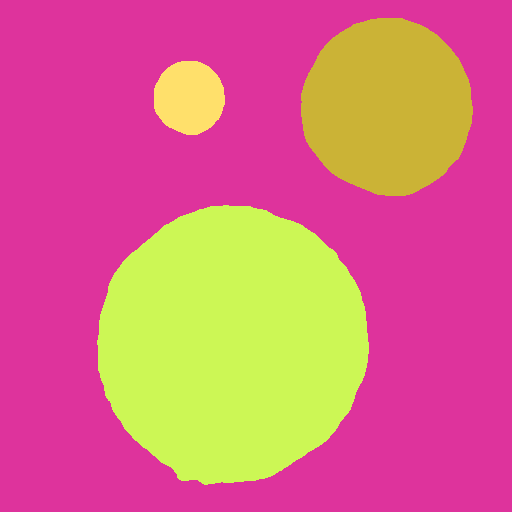

Unknown image resource 1092


{
    "10236894": {
        "caption": "a highly detailed photorealistic image of a wooden table"
    },
    "3584971": {
        "caption": "a highly detailed photorealistic image of a red tennis ball"
    },
    "5633996": {
        "caption": "a highly detailed photorealistic image of a blue crystal ball"
    },
    "7069951": {
        "caption": "a highly detailed photorealistic image of a gold coin"
    }
}
['a highly detailed photorealistic image of {a gold coin:7069951}, {a blue crystal ball:5633996} and {a red tennis ball:3584971} on {a wooden table:10236894}.']


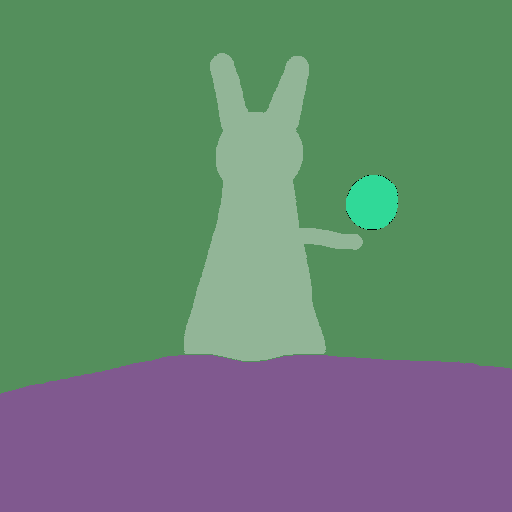

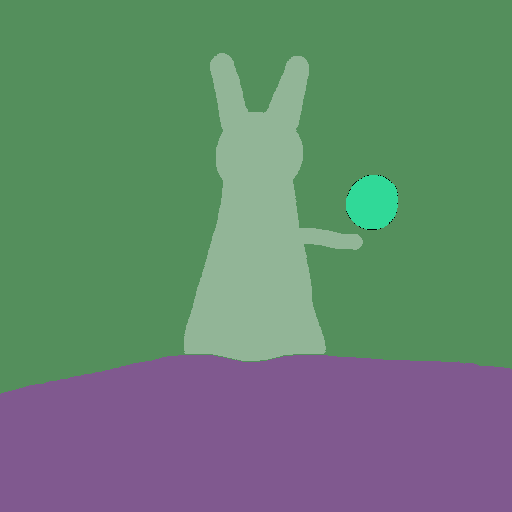

{
    "6066004": {
        "caption": "a digital art of a blue sky background"
    },
    "9394560": {
        "caption": "a digital art of clouds"
    },
    "10017072": {
        "caption": "a digital art of a fire ball"
    },
    "9942418": {
        "caption": "a digital art of a rabbit mage"
    }
}
['a digital art of {a rabbit mage:9942418} standing on {clouds:9394560} casting {a fire ball:10017072}. {Background is a blue sky:6066004}.']


In [112]:
fps = ['/USERSPACE/lukovdg1/datasets2/datasets/images/balls2.psd', '/USERSPACE/lukovdg1/datasets2/datasets/images/rabbitfire6.psd']
tosave = []
for fp in fps:
    example = psd_to_cocopanoptic(fp)
    display(example.load_image())
    display(example.load_seg_image())
    print(json.dumps(example.seg_info, indent=4))
    print(example.captions)
    tosave.append(example)
    

In [114]:
with open("extradev.examples.pkl", "wb") as f:
    pkl.dump([tosave[0], tosave[0], tosave[1], tosave[1]], f)